<span style="font-size:100%">  
<style>
image {
  max-width: 60%;
  max-height: 40%
}

</style>

* 개요
# 나는 망한것 같다.

랩 인턴을 시작했다. 그것도 학교 필수 전공수업으로 <br>
작은 문제가 하나 있긴 한데 다른 사람의 지원이 없다는거?<br>
원래 학사 인턴 이라는게 연구실 입장에선 아무것도 모르는 초짜 한 명 받아서 하는거라지만<br>
나 빼고 다른 애들은 박사생 한 명씩 붙여주는데 나같은 경우는 전임자가 만들었다는 프로젝트 던져주고 끝이다.<br>
환경 설정은 도와준다는데 이러면 사실상 혼자 하는 프로젝트가 되어버렸다 야호!<br>

오히려 좋아, 이러면 그냥 나 혼자 알아서 처음부터 끝까지 구현해버려야지<br>
도대체 전임자가 무슨 짓을 했는지는 모르겠다만 파일 크기가 4기가가 넘어가는걸 보아하니 무언가 있긴 한가보다. ocr 프로그램 파일 크기가 좀 큰가봐<br>

그래서 이번에 할 것은 무엇이냐면<br>
카메라에 연결되어 있는 간이박스를 yolo V8을 이용하여 객체감지 및 OCR을 이용한 글자 추출 및 문서화 하기다.<br>
생각대로 되면 금방 끝나는 쉬운 프로젝트가 되겠다만, 인생이 그럴리가 있나. 이름만 들어도 빡세보이잖아.<br>
재작년에 하다가 랜섬웨어 먹고 죽어버린 내 이전 프로젝트랑 비슷한데 한 번 만들어 봐야겠다.<br>

**구상중인 코드의 로직은 다음과 같다.**<br>
1. 우선 전임자가 작성한 코드의 결과를 볼것이다.<br>
   실행하는 방법이랑 결과만 보고, 이미지 보정을 진행했을 때 어떻게 나오는지 확인 할 예정이다.

2. 우선 이미지의 보정을 진행한다. 나의 경우 이미지가 주황색 박스에 들어있는 왁스블록을 찾는것이 목표이며,<br>
   카메라에 찍혀있는 이미지가 기울어져 있는 문제를 해결하기 위해 우선적으로 주황색 부분을 찾고, 윤곽선을 찾아 이미지를 수평화 한다.<br>

3. 수평화 되어있는 이미지에 대해 객체검출(object detection) 을 시도한다. <br>

4. 검출된 파일에 대해 OCR을 진행한다. 여기서는 구글의 pytesseract 바이두의 paddlepaddle 두가지를 사용 해 볼 계획이다.<br>
   궁금하지 않은가 중국 AI 발전이 무섭다 무섭다 하는데 실제로 어느수준까지 왔을지<br>

5. 검출된 객체들에 대해 개별적인 ocr을 진행하여 인식률을 높일 수 있는가에 대한 실험을 진행 할 것이다. <br>
   
6. 

* 1. 라벨링 하기

사실상 코딩과 함께 가장 큰 시간을 차지하는 것이 라벨링이다. 어쩔 수 없다. 이미지랑 라벨 던져놓으면 YOLO가 알아서 함수 짜서 객체탐지를 해주겠다만,<BR>
이미지랑 라벨링은 우리가 해야한다.<br>
<image src="./blog_photo/image1.png" width = "600" height = "300"><br>

그대로 다운로드 받아도 되지만, 다음과 같은 방법을 이용해서 쉽게 다운로드 받을 수 있다.

**원하는 폴더에**
> git clone https://github.com/heartexlabs/labelimage 

pyqt5랑 lxml이 설치되어 있어야 하며, 만약에 설치되어 있지 않다면 다음과 같은 명령어로 설치하면 된다.<br>
>pip install pyqt5 lxml

labelimage 디렉토리에서는 **resources.qrc** 라는 파일을 컴파일 하는 작업을 추가적으로 진행해줘야 하며, 이는 다음과 같이 실행할 수 있다.<br>
>pyrcc5 -o libs/resources.py resources.qrc<br>
<pre>



</pre>  
파일을 실행하기 전에 우선적으로 data 폴더에 들어가서 **predefined_classes.txt** 파일을 열어준다.<br>
<image src="./blog_photo/image4.png"><br>

<image src="./blog_photo/image5.png"><br>
클래스 지정이 끝났다면, 이제 파일을 다운로드 받은 폴더에서 파일을 실행시켜 보자.<br>


<image src="./blog_photo/image2.png"><br>
<image src="./blog_photo/image3.png"><br>

이제 w를 클릭하여 원하는 곳에 라벨링을 해주고, 라벨링이 끝나면 save를 눌러준다.<br>
ctrl + s 를 눌러도 저장이 된다.<br>
a,d 를 누르면 다음 이미지, 이전 이미지로 이동된다. <br>
</span>

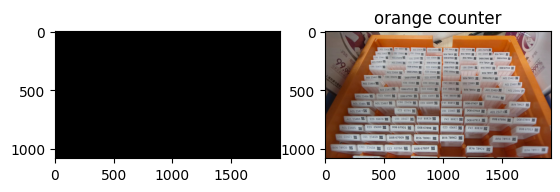

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#imageload
image = cv2.cvtColor(cv2.imread('./images/3.jpg'), cv2.COLOR_BGR2RGB)

#find orange counter
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_orange = np.array([10, 100, 100])
upper_orange = np.array([30, 255, 255])
mask = cv2.inRange(hsv, lower_orange, upper_orange)
res = cv2.bitwise_and(image, image, mask=mask)
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#plot orange contour result
plt.subplot(1,2,1)
plt.imshow(res)

plt.subplot(1,2,2).set_title('orange counter')
plt.imshow(image)

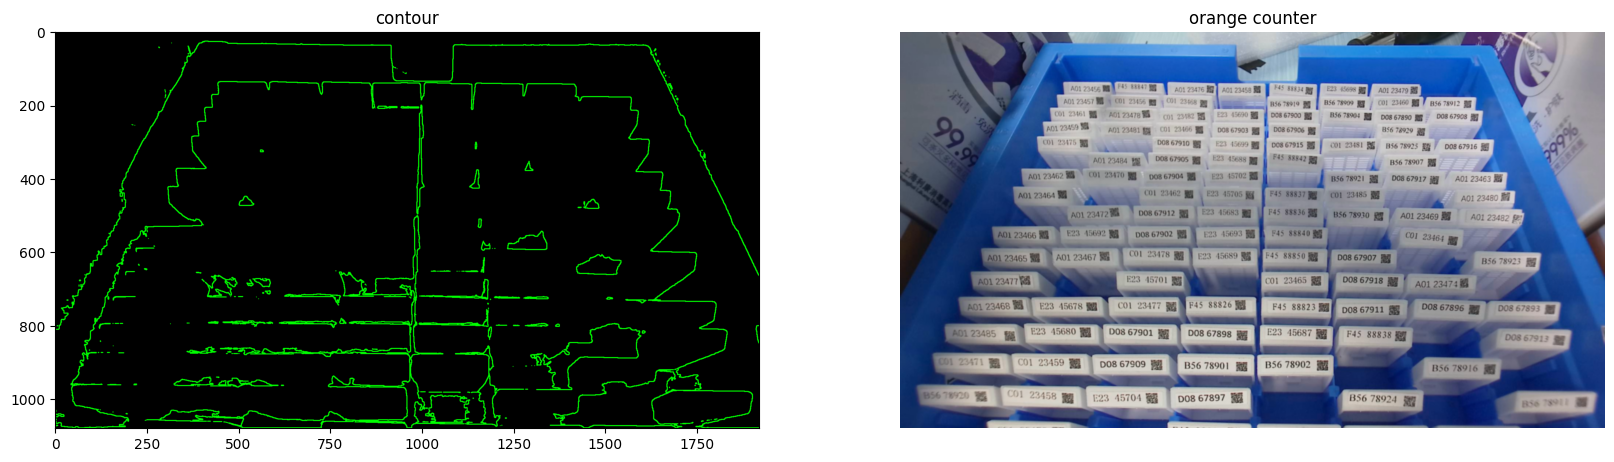

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read the image
image = cv2.imread('./images/3.jpg')
#apply gaussian blur 
image = cv2.GaussianBlur(image, (5, 5), 0)
# Convert the image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define lower and upper threshold values for the orange color range
lower_orange = np.array([0, 100, 100], dtype=np.uint8)
upper_orange = np.array([20, 255, 255], dtype=np.uint8)

# Threshold the image to get only the orange regions
mask = cv2.inRange(hsv, lower_orange, upper_orange)

# Find contours in the masked image
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank canvas to draw the contours
canvas = np.zeros_like(image)

# Draw the contours on the canvas
cv2.drawContours(canvas, contours, -1, (0, 255, 0), 2)

# Convert the canvas to RGB for plotting
canvas_rgb = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)

# Plot the image with contours
plt.figure(figsize=(20,12))
plt.subplot(1,2,1).set_title('contour')
plt.imshow(canvas_rgb)
plt.subplot(1,2,2).set_title('orange counter')
plt.imshow(image)
plt.axis('off')
plt.show()


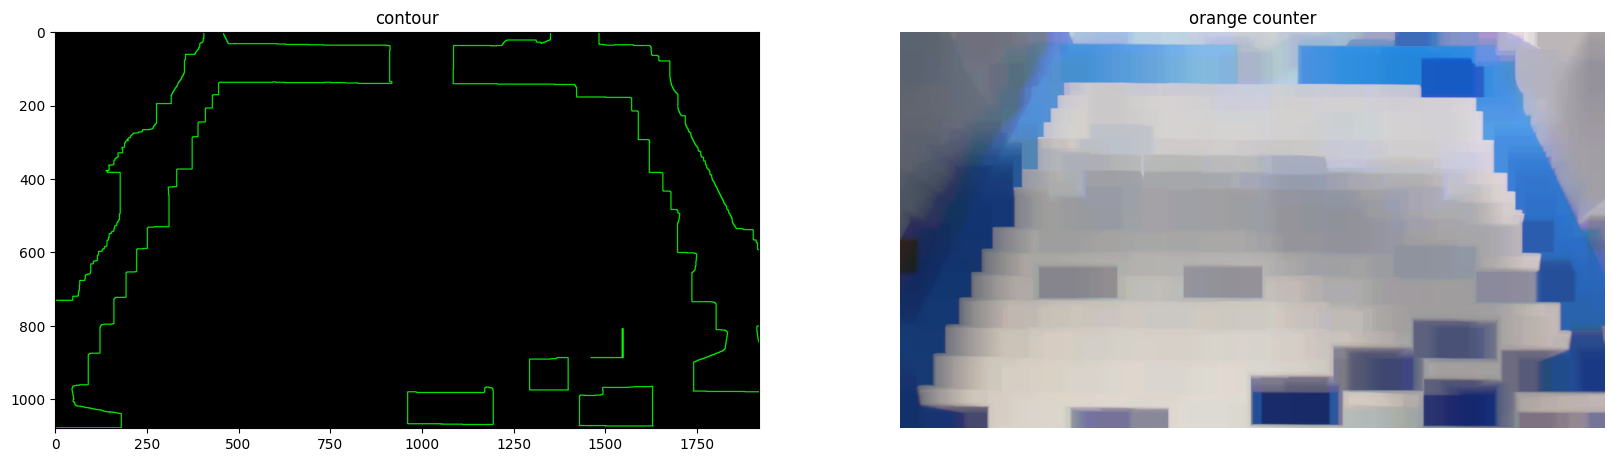

In [3]:
# Read the image
image = cv2.imread('./images/3.jpg')
#apply gaussian blur to image
image = cv2.GaussianBlur(image, (5, 5), 0)

#apply dialation to image
kernel = np.ones((80,80),np.uint8)
image = cv2.dilate(image,kernel,iterations = 1)
image = cv2.erode(image,kernel,iterations = 1)

# Convert the image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define lower and upper threshold values for the orange color range
lower_orange = np.array([0, 100, 100], dtype=np.uint8)
upper_orange = np.array([20, 255, 255], dtype=np.uint8)

# Threshold the image to get only the orange regions
mask = cv2.inRange(hsv, lower_orange, upper_orange)

# Find contours in the masked image
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank canvas to draw the contours
canvas = np.zeros_like(image)

# Draw the contours on the canvas
cv2.drawContours(canvas, contours, -1, (0, 255, 0), 2)

# Convert the canvas to RGB for plotting
canvas_rgb = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)

# Plot the image with contours
plt.figure(figsize=(20,12))
plt.subplot(1,2,1).set_title('contour')
plt.imshow(canvas_rgb)
plt.subplot(1,2,2).set_title('orange counter')
plt.imshow(image)
plt.axis('off')
plt.show()

In [4]:
def find_first_contour_pixel(image, start, direction):
    height, width = image.shape[:2]
    x, y = start

    while 0 <= y < height and 0 <= x < width:
        if np.any(image[y, x] > 0):  # If pixel is part of a contour
            return x, y

        x += direction[0]
        y += direction[1]

    return None  # No contour pixel found

# Assume binary_image is a binary image where contours are white and the rest is black
left_top = find_first_contour_pixel(canvas_rgb, (100, 100), (1, 0))  # Right
right_top = find_first_contour_pixel(canvas_rgb, (1900, 100), (-1, 0))  # Left

left_bottom = find_first_contour_pixel(canvas_rgb, (20, 20), (0, 1))  # Down
right_bottom = find_first_contour_pixel(canvas_rgb, (1900, 20), (0, 1))  # Down

print(left_top, right_top, left_bottom, right_bottom)

(351, 100) (1675, 100) (20, 731) (1900, 539)


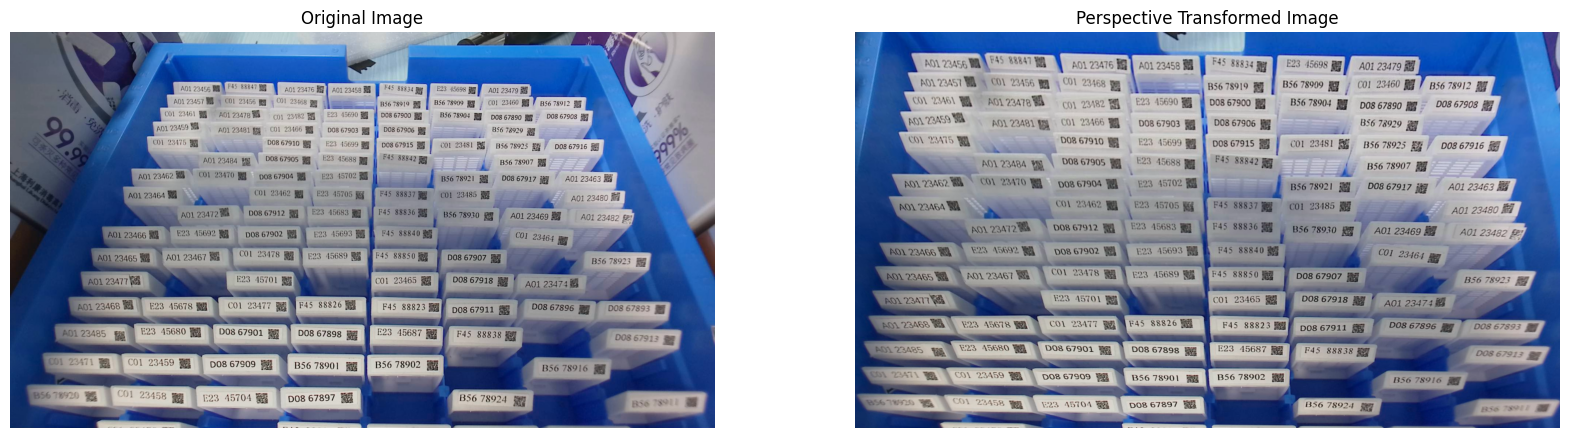

In [6]:
image = cv2.cvtColor(cv2.imread('./images/3.jpg'), cv2.COLOR_BGR2RGB)

pts1 = np.float32([left_top, right_top, (0,1080), (1920,1080)])

# Define the destination points. They could be any points, but in this case we'll map the original points to a rectangle.
pts2 = np.float32([[0,0], [image.shape[1],0], [0,image.shape[0]], [image.shape[1],image.shape[0]]])

# Get the perspective transformation matrix
matrix = cv2.getPerspectiveTransform(pts1, pts2)

# Apply the perspective transformation
result = cv2.warpPerspective(image, matrix, (image.shape[1], image.shape[0]))

# Display the original and transformed images using matplotlib
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Perspective Transformed Image')
plt.axis('off')

plt.show()